<table>
    <tr>
      <td>Introducción a
      </td>
      <td>
      <img src="https://media.licdn.com/dms/image/D5612AQF7GSp3l4pztQ/article-cover_image-shrink_720_1280/0/1686548640655?e=1715817600&v=beta&t=WQzv1EMkEEwZ0QZ0PF1anRKIHCl5BBH_YPZHdDQsWPM"  width=150/>
      </td>
     </tr>
</table>

## Regresión lineal

### Índice
[Obtención del modelo](#modelo)<br>
[Afinando el error](#error)<br>
[Intervalo de confianza](#intervalo)<br>
[Mejorando el modelo](#mejorando)<br>
[Lasso y Ridge](#lasso)<br>
[Regresión Series Temporales](#series)<br>


<a name="modelo"></a>
## Obtención del modelo

Empezamos cargando un fichero con las notas de las pruebas PISA. Recordamos la importancia del preprocesado, pero es aquí nos dan ya los datos preparados para que nos centremos en la regresión

In [1]:
# Carga del fichero
import pandas as pd
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/pisaDataClean.csv"
df = pd.read_csv(url)
df

,RPC,COUNTRY,MAT,MAT_FE,MAT_MA,REA,REA_FE,REA_MA,SCI,SCI_FE,SCI_MA
0,13274,Albania,413.1570,417.750029,408.545459,405.2588,434.639626,375.759199,427.2250,439.442963,414.957644
1,15757,Algeria,359.6062,363.072479,356.495106,349.8593,366.208167,335.185436,375.7451,383.220939,369.035234
2,21528,Argentina,409.0333,400.443116,418.388361,425.3031,432.958080,416.966607,432.2262,424.994351,440.102030
3,52190,Australia,493.8962,490.985501,496.761345,502.9006,518.865799,487.185525,509.9939,508.921647,511.049257
4,51936,Austria,496.7423,483.133026,510.098216,484.8656,495.075191,474.846032,495.0375,485.526754,504.371197
...,...,...,...,...,...,...,...,...,...,...,...
58,40289,Spain,485.8432,477.859261,493.848504,495.5764,505.684720,485.441145,492.7861,489.456046,496.125124
59,53077,Sweden,493.9181,495.052562,492.804135,500.1556,519.949815,480.718278,493.4224,495.718307,491.167800
60,28346,Turkey,420.4540,417.527011,423.377693,428.3351,442.246081,414.439584,425.4895,428.654774,422.327767
61,68662,United Arab Emirates,427.4827,430.702033,424.173383,433.5423,458.287029,408.105325,436.7311,449.338558,423.771046


1.- Dividir las columnas en X e y en train y test. Nuestro objetivo será deducir la columna MAT desde SCI y REA

In [2]:

XColumns = ["SCI", "REA"]
yColumn = "MAT"
X = df[XColumns]
y = df[yColumn]


In [3]:
X

,SCI,REA
0,427.2250,405.2588
1,375.7451,349.8593
2,432.2262,425.3031
3,509.9939,502.9006
4,495.0375,484.8656
...,...,...
58,492.7861,495.5764
59,493.4224,500.1556
60,425.4895,428.3351
61,436.7311,433.5423


In [4]:
y

0     413.1570
1     359.6062
2     409.0333
3     493.8962
4     496.7423
        ...   
58    485.8432
59    493.9181
60    420.4540
61    427.4827
62    492.4785
Name: MAT, Length: 63, dtype: float64

2.- Dividir las columnas en X e y en train y test. Nuestro objetivo será deducir la columna MAT desde SCI y REA

In [5]:

from sklearn.model_selection import train_test_split

test = 0.95 # 40%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test)

In [6]:
X_train

,SCI,REA
39,415.7288,424.9052
34,435.3630,436.5721
3,509.9939,502.9006


In [7]:
y_train

39    389.6438
34    417.9919
3     493.8962
Name: MAT, dtype: float64

3.- Declarar el método y  entrenar con el conjunto train, obteniendo un *modelo*

In [8]:
from sklearn.linear_model import LinearRegression
metodo = LinearRegression()
modelo = metodo.fit(X_train,y_train) # y  = f(x); MAT = b + a1 SCI + a2 REA

El modelo representa simplemente la recta que mejor ajusta las (X,y) dadas:

In [9]:
modelo.intercept_, modelo.coef_

(47.12436930007863, array([ 2.30474695, -1.44886495]))

Es decir, dada una nota en ciencia `sci` y lectura `rea`, se puede obtener la nota de matemáticas `mat` de la siguiente forma:

mat = -56.25  + 0.90*sci + 0.21*rea    (ojo, estos números irán variando de ejecución e en ejecución)

Aunque veremos que estas predicciones las vamos a hacer automáticamente, podemos escribir por nuestra cuentra una función que las haga:

In [10]:
def y_predict(X,modelo):
    s = modelo.intercept_
    for i,x in enumerate(X):
        s += x*modelo.coef_[i]
    return s

y_predict([400,450],modelo)

317.03392007668356

In [11]:
modelo.predict([ [400,450], [600,580] ])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([317.03392008, 589.63086575])

In [12]:
df.describe()

,RPC,MAT,MAT_FE,MAT_MA,REA,REA_FE,REA_MA,SCI,SCI_FE,SCI_MA
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,38231.492063,458.878611,456.666206,461.112029,461.764438,476.860812,446.760410,464.924883,465.160165,464.733040
std,23866.666268,50.811613,49.576609,52.334665,46.212095,45.164406,48.360072,46.687935,45.151592,48.831863
min,5998.000000,327.702000,329.745931,325.586561,349.859300,366.208167,335.185436,331.638800,330.828991,332.477015
25%,21072.000000,417.588750,417.128338,418.260475,427.012750,442.215541,412.238123,426.357250,430.377770,423.049407
50%,33842.000000,476.830900,472.739508,477.767728,478.960600,492.034800,460.103602,475.391200,472.586346,471.766923
75%,49016.500000,494.870800,493.087239,499.616330,498.915150,510.021003,487.043469,501.686100,497.087670,505.496834
max,128702.000000,564.189700,564.254534,564.129003,535.100200,550.511164,525.315266,555.574700,552.273031,558.663734


Vamos a representar gráficamente los datos de entrenamiento y la recta modelo

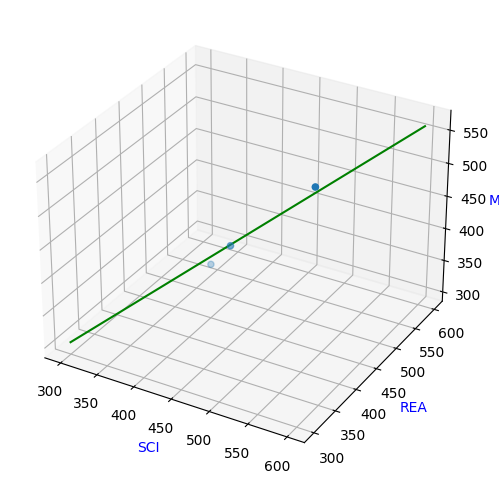

In [13]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure(figsize=(14,6))

# projection='3d' indica que este subplot es en 3d
ax = fig.add_subplot(1, 2, 1, projection='3d')
x = X_train["SCI"]
y = X_train["REA"]
z = y_train
ax.scatter3D( x, y, z)

y_1 = y_predict([300,300],modelo)
y_2 = y_predict([600,600],modelo)
ax.plot3D([300,600],[300,600],[y_1,y_2],color="green")
ax.set_zlabel(r"MAT", fontsize=10, color="blue")
ax.set_xlabel(r"SCI", fontsize=10, color="blue")
ax.set_ylabel(r"REA", fontsize=10, color="blue")
plt.show()

4.- Ahora predecimos con el test y mostramos el error

In [14]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test,y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
print( f"r^2: {round(r2,3)} RMSE: {round(rmse,3)}, MAE:{round(mae,3)}" )

r^2: 0.74 RMSE: 25.708, MAE:21.109


In [15]:
# bias

(y_test - y_pred).abs().mean()

21.108656538288027

In [16]:
X_t = X_test.copy()
X_t["MAT"] = y_test
X_t["MAT_PRED"] = y_pred
X_t["RESIDUO"] = y_test - y_pred
X_t

,SCI,REA,MAT,MAT_PRED,RESIDUO
47,480.5468,484.7580,489.7287,452.314263,37.414437
9,501.9369,499.8146,511.0876,479.798051,31.289549
31,424.5905,427.2733,417.2434,406.636719,10.606681
30,421.3373,409.1301,415.4638,425.425963,-9.962163
55,513.3035,509.2707,495.2233,492.294576,2.928724
26,486.6310,494.6278,494.0600,452.036798,42.023202
25,501.1001,498.1289,491.6270,480.311790,11.315210
32,386.4034,361.0555,366.8180,414.565766,-47.747766
14,476.7475,469.5233,476.8309,465.630861,11.200039
18,490.2250,487.7581,482.3051,470.273326,12.031774


In [17]:
X_t.describe()

,SCI,REA,MAT,MAT_PRED,RESIDUO
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,465.486365,462.113028,460.130343,450.413278,9.717066
std,46.904344,46.707138,50.804947,46.456789,24.001604
min,331.638800,349.859300,327.702000,293.154266,-56.509381
25%,426.791125,427.076875,417.761425,417.675813,-6.651096
50%,475.400050,480.199850,477.607150,452.383342,11.604686
75%,501.560700,498.719675,495.603050,480.317325,25.543582
max,555.574700,535.100200,564.189700,552.295538,52.879513


Y completamos la figura mostrando los puntos de entrenamiento, de test y la recta

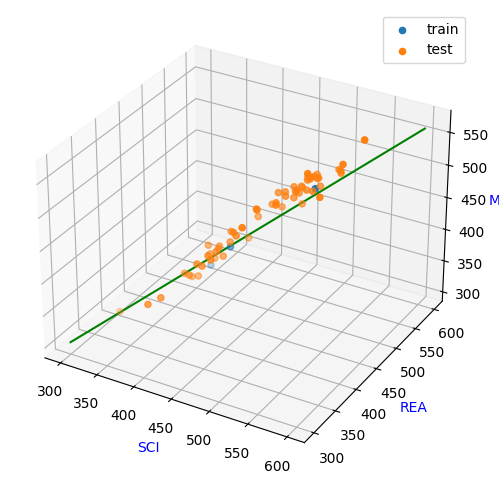

In [18]:
fig = plt.figure(figsize=(14,6))

# projection='3d' indica que este subplot es en 3d
ax = fig.add_subplot(1, 2, 1, projection='3d')
x = X_train["SCI"]
y = X_train["REA"]
z = y_train
ax.scatter3D( x, y, z,label="train")

y_1 = y_predict([300,300],modelo)
y_2 = y_predict([600,600],modelo)
ax.plot3D([300,600],[300,600],[y_1,y_2],color="green")
ax.set_zlabel(r"MAT", fontsize=10, color="blue")
ax.set_xlabel(r"SCI", fontsize=10, color="blue")
ax.set_ylabel(r"REA", fontsize=10, color="blue")


##### Esto es lo nuevo
x = X_test["SCI"]
y = X_test["REA"]
z = y_test
ax.scatter3D( x, y, z,label="test")
plt.legend()

plt.show()

**Ejercicio 1** Repetir desde el paso 1, cambiando tan solo el tamaño del test a 0.95 ¿qué sucede con el error?


Este es un ejemplo de overfitting: cuando por alguna razón (en este caso por falta de datos de entrenamiento), el modelo generado se comporta mucho mejor sobre el entrenamiento que sobre el test. Repitamos todo el proceso:

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

# 0 cargar datos
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/pisaDataClean.csv"
df = pd.read_csv(url)

# 1 Columnas x e y
XColumns = ["SCI", "REA"]
yColumn = "MAT"
X = df[XColumns]
y = df[yColumn]

# 2 train y test
test = 40 # 40%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test)

# 3 crear model
metodo = LinearRegression()
modelo = metodo.fit(X_train,y_train) # y  = f(x); MAT = b + a1 SCI + a2 REA

# 4 evaluar
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test,y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
bias = (y_test - y_pred).mean()
print( f"r^2: {round(r2,3)} RMSE: {round(rmse,3)}, MAE:{round(mae,3)}, BIAS: {round(bias,3)}" )


r^2: 0.927 RMSE: 12.086, MAE:9.734, BIAS: -2.621


<a name="error"></a>


## Afinando el error

**Ejercicio 2** Ejecutar varias veces el código anterior, se verá que se obtiene resultados diferentes ¿en qué punto del código se produce esta variación?

De hecho, si se quieren obtener resultados con una cierta verosimilitud tendremos que repetir el experimento (pasos 2,3,4) varias veces. Vamos a instalar el paquete progress bar para ver cómo progresan los experimentos

In [20]:
# Carga del fichero
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

from tqdm import tqdm

url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/pisaDataClean.csv"
df = pd.read_csv(url)

# 1
XColumns = ["SCI", "REA"]
yColumn = "MAT"
X = df[XColumns]
y = df[yColumn]

veces = 5000


resultados = []
for v in tqdm(range(veces)):
    # 2
    test = 0.4
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test)

    # 3
    metodo = LinearRegression()
    modelo = metodo.fit(X_train,y_train)

    # 4
    y_pred = modelo.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    rmse = math.sqrt(mean_squared_error(y_test,y_pred))
    mae = mean_absolute_error(y_test,y_pred)
    bias = (y_test - y_pred).mean()
    resultados.append([round(r2,3),round(rmse,3),round(mae,3),round(bias,3)])
    #print(f"r^2: {round(r2,3)} RMSE: {round(rmse,3)}, MAE:{round(mae,3)}")

df_errores = pd.DataFrame(resultados,columns=["r^2","RMSE","MAE","BIAS"])
df_errores

100%|██████████| 5000/5000 [00:40<00:00, 123.92it/s]


,r^2,RMSE,MAE,BIAS
0,0.951,11.202,8.660,-2.177
1,0.942,12.600,10.504,3.331
2,0.925,12.595,10.383,8.603
3,0.948,11.777,9.440,-1.990
4,0.944,12.209,8.927,-2.071
...,...,...,...,...
4995,0.948,11.715,9.607,4.908
4996,0.949,12.743,10.830,3.446
4997,0.960,10.267,8.065,3.942
4998,0.954,11.196,8.878,0.989


In [21]:
df_errores.describe()

,r^2,RMSE,MAE,BIAS
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.942025,11.749168,9.469654,-0.062805
std,0.016217,1.186106,1.109122,3.007618
min,0.850000,7.311000,5.677000,-10.986000
25%,0.933000,10.975750,8.735750,-2.092500
50%,0.944000,11.752500,9.444500,-0.017000
75%,0.954000,12.533000,10.196250,1.992250
max,0.980000,16.348000,13.678000,10.835000


In [22]:
df_errores.describe().loc["mean"]

r^2      0.942025
RMSE    11.749168
MAE      9.469654
BIAS    -0.062805
Name: mean, dtype: float64

Estamos cometiendo un error +- 24. Paso final: generar el verdadero modelo

In [23]:
metodo = LinearRegression()
modelo = metodo.fit(X,y)

In [24]:
from joblib import dump
dump(modelo, 'predice_pisa.joblib')

['predice_pisa.joblib']

Es fácil hacer una función que haga el trabajo de los experimentos. Podemos usarla para evaluar la regresión con otros datos

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math
from tqdm import tqdm

def evalua_regresion(df,XColumns,yColumn,veces=500):
    # 1
    X = df[XColumns]
    y = df[yColumn]



    resultados = []
    for v in tqdm(range(veces)):
        # 2
        test = 0.4
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test)

        # 3
        metodo = RandomForestRegressor()
        modelo = metodo.fit(X_train,y_train)

        # 4
        y_pred = modelo.predict(X_test)
        r2 = r2_score(y_test,y_pred)
        rmse = math.sqrt(mean_squared_error(y_test,y_pred))
        mae = mean_absolute_error(y_test,y_pred)
        bias = (y_test - y_pred).mean()
        resultados.append([round(r2,3),round(rmse,3),round(mae,3),round(bias,3)])
        #print(f"r^2: {round(r2,3)} RMSE: {round(rmse,3)}, MAE:{round(mae,3)}")

    df_errores = pd.DataFrame(resultados,columns=["r^2","RMSE","MAE","BIAS"])
    return df_errores.describe().loc["mean"]


In [61]:
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/pisaDataClean.csv"
df = pd.read_csv(url)

# 1
XColumns = ["SCI", "REA"]
yColumn = "MAT"
print(evalua_regresion(df,XColumns,yColumn))

100%|██████████| 500/500 [00:45<00:00, 11.05it/s]

r^2      0.910332
RMSE    14.775216
MAE     11.312610
BIAS     0.241234
Name: mean, dtype: float64


**Ejercicio 3**

- Si se en lugar de predecir "MAT" desde "SCI" y "REA" tuviéramos que predecir "SCI" desde las otras dos o "REA" desde las otras dos cual daría mejores resultados
- Si solo queremos utilizar un atributo, ya sea "SCI" o "REA" para predecir "MAT" ¿cuál usarías?

In [62]:
from sklearn.preprocessing import MinMaxScaler

url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/pisaDataClean.csv"
df = pd.read_csv(url)

# 1
XColumns = ["MAT", "SCI","RPC"]
yColumn = "REA"

# escalado; inútil en este caso, pero por probar...
metodo_escalado  = MinMaxScaler()
modelo_escalado = metodo_escalado.fit(df[XColumns])
datos_escalados = modelo_escalado.transform(df[XColumns])

df.loc[:,XColumns] = datos_escalados

print(evalua_regresion(df,XColumns,yColumn))

100%|██████████| 500/500 [00:46<00:00, 10.76it/s]

r^2      0.890748
RMSE    14.781670
MAE     11.354080
BIAS    -1.268618
Name: mean, dtype: float64


In [63]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, r2_score,mean_squared_error,mean_absolute_error
import math

# Ejemplo

# paso 0
url = "https://raw.githubusercontent.com/RafaelCaballero/BME/main/data/currencies.csv"
df_cur = pd.read_csv(url)[["Close_CAD","Close_JPY","Close_EUR"]]

metodos = [("LinearRegression",LinearRegression()),
               ("GradientBoostingRegressor",GradientBoostingRegressor()),
               ("AdaBoostRegressor",AdaBoostRegressor()),
               ("RandomForestRegressor",RandomForestRegressor()),
               ("DecisionTreeRegressor",DecisionTreeRegressor()),
               ("SVR",SVR())

              ]

def regresión(df,nombreMetodo,varmetodo,XColumns,yColumn):
  # 1
  X = df[XColumns]
  y = df[yColumn]

  # 2
  from sklearn.model_selection import train_test_split
  test = 0.70
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test)

  # 3
  metodo = varmetodo
  modelo = metodo.fit(X_train,y_train)

  # 4
  from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
  import math
  y_pred = modelo.predict(X_test)
  r2 = r2_score(y_test,y_pred)
  rmse = math.sqrt(mean_squared_error(y_test,y_pred))
  mae = mean_absolute_error(y_test,y_pred)
  print(f"{nombreMetodo}: r^2: {round(r2,3)} RMSE: {round(rmse,3)}, MAE:{round(mae,3)}")


XColumns = ["Close_CAD", "Close_JPY"]
yColumn = "Close_EUR"

for nombre,met in metodos:
    regresión(df_cur,nombre,met,XColumns,yColumn)



LinearRegression: r^2: 0.69 RMSE: 0.07, MAE:0.055
GradientBoostingRegressor: r^2: 0.88 RMSE: 0.044, MAE:0.033
AdaBoostRegressor: r^2: 0.809 RMSE: 0.055, MAE:0.045
RandomForestRegressor: r^2: 0.891 RMSE: 0.042, MAE:0.028
DecisionTreeRegressor: r^2: 0.826 RMSE: 0.053, MAE:0.031
SVR: r^2: 0.698 RMSE: 0.07, MAE:0.056


array([[0.36135072, 0.42684625, 0.05929717],
       [0.1349085 , 0.19695949, 0.07953286],
       [0.34391345, 0.44917943, 0.12656474],
       [0.70276044, 0.79645604, 0.37645065],
       [0.71479531, 0.72966728, 0.37438062],
       [0.75810454, 0.76075743, 0.34440605],
       [0.20875293, 0.30831725, 0.08313502],
       [0.3067872 , 0.39283206, 0.09511507],
       [0.46278221, 0.45083258, 0.26879319],
       [0.77545513, 0.76047699, 0.37199276],
       [0.81115043, 0.90452179, 0.22692007],
       [0.77540988, 0.88874718, 0.32879124],
       [0.69863422, 0.7293998 , 0.32170915],
       [0.53249239, 0.55011278, 0.18792378],
       [0.63059897, 0.64799213, 0.20676588],
       [0.67796845, 0.63228495, 0.3921877 ],
       [0.74430932, 0.76332692, 0.60247425],
       [0.55865062, 0.55750239, 0.17353957],
       [0.6537469 , 0.70817676, 0.19144445],
       [0.33964346, 0.37542484, 0.11913222],
       [0.38155092, 0.35579289, 0.10336256],
       [0.78038224, 0.79011896, 0.41104609],
       [0.

<a name="intervalo"></a>
## Intervalos de confianza

Si ahora ejecutamos varias veces el código veremos que los resultados son bastante estables. Aun así persiste una duda...cuando hagamos una predicción ¿podemos estimar lo lejos que está del valor real?

Vamos a poder hacerlo con un par de condiciones:

1.- Que el bias sea muy próximo a 0

2.- Que el RMSE sea una normal

La condición 1 la tenemos; hay que tener en cuenta que un valor de alrededor de -0.1...0.1 en

In [29]:
df.MAT.mean()

0.5546868235054554

es muy pequeño. En cuanto al RMSE por simplificar nos conformamos con "ver" el histograma

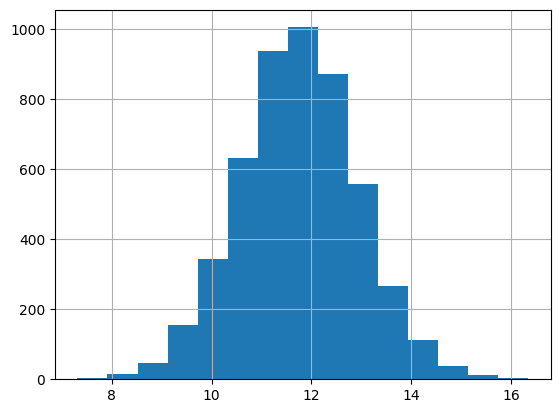

In [30]:
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(5, 5))
df_errores.RMSE.hist(bins=15)
plt.show()

Asumiendo que esto es una normal, podemos decir que, con un 95% de probabilidades, para cualquier predicción p el valor real estará en el intervalo

[p -2RMSE, p+2RMSE]

Este intervalo de confianza se mantiene siempre y cuando estemos (aprox.) dentro del rango de valores usados en el entrenamiento

In [31]:
X_train.describe()

,SCI,REA
count,37.000000,37.000000
mean,462.298884,461.405932
std,48.118426,45.142128
min,331.638800,349.859300
25%,421.337300,427.273300
50%,475.408900,481.525500
75%,498.481100,495.576400
max,534.193700,526.424700


**Ejemplo**

In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/pisaDataClean.csv"
df = pd.read_csv(url)

# 1
XColumns = ["SCI", "REA"]
yColumn = "MAT"
X = df[XColumns]
y = df[yColumn]

metodo = LinearRegression()
modelo = metodo.fit(X.values,y)

p = modelo.predict([[400,450]])[0]

p

398.4561326792768

Como el RMSE es aproximadamente 11.75, tendremos que con un 95% de probabilidades el valor real está entre

In [33]:
RMSE = 11.75
(p-1.96*RMSE,p+1.96*RMSE)

(375.42613267927675, 421.4861326792768)

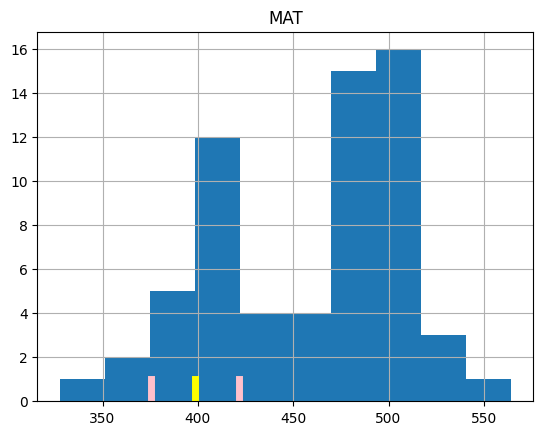

In [34]:
import matplotlib.pyplot as plt
df[["MAT"]].hist()
plt.plot([p-1.96*RMSE,p-1.96*RMSE],[0,1],color="pink",linewidth=5)
plt.plot([p+1.96*RMSE,p+1.96*RMSE],[0,1],color="pink",linewidth=5)
plt.plot([p,p],[0,1],color="yellow",linewidth=5)
plt.show()

Sin embargo, los siguientes diagramas de residuos nos indican que algo no está funcionando como esperábamos

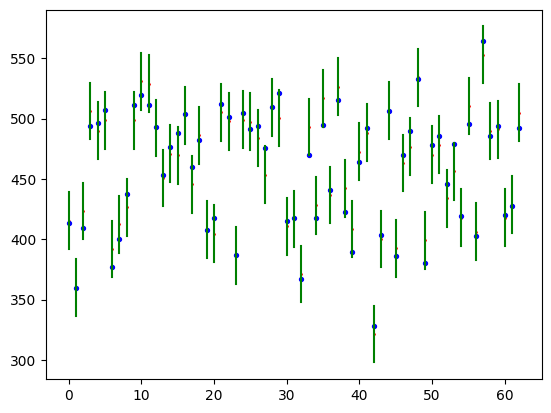

In [35]:
X = df[XColumns]
y = df[yColumn]

x = range(len(y))
y_pred = modelo.predict(X.values)
plt.scatter(x,y_pred,color="red",s=1)
plt.scatter(x,y,color="blue",s=8)
for i,v in enumerate(y_pred):
    plt.plot([x[i],x[i]], [v-2*RMSE,v+2*RMSE],color="green")
#for y_v in y_pred:

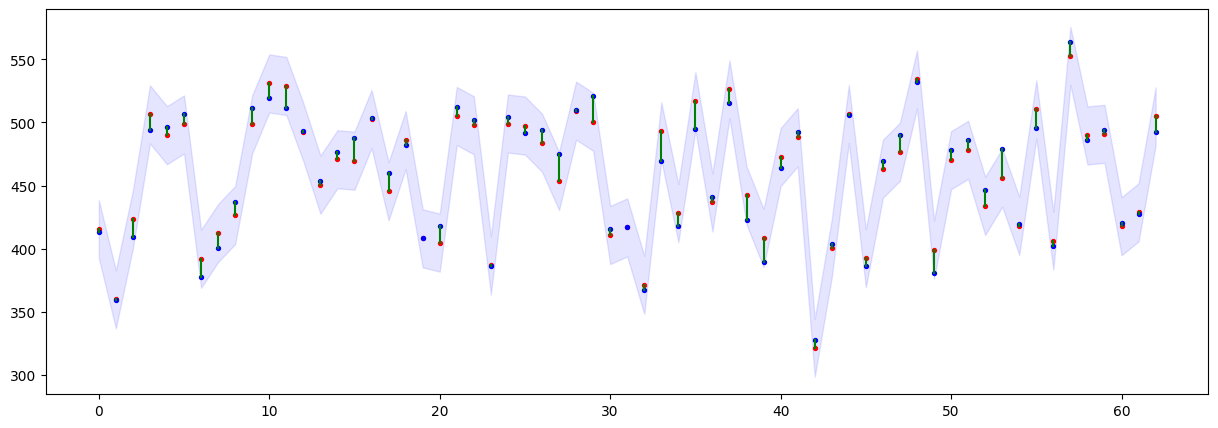

In [36]:
x = range(len(y))
fig, ax = plt.subplots(figsize=(15, 5))
y_pred = modelo.predict(X.values)
ci = 1.96*RMSE
for i,v in enumerate(y_pred):
    plt.plot([x[i],x[i]], [v,y[i]],color="green")
ax.fill_between(x, ( y_pred-ci), ( y_pred+ci), color='b', alpha=.1)
ax.scatter(x,y_pred,color="red",s=8)
ax.scatter(x,y,color="blue",s=8)
plt.show()

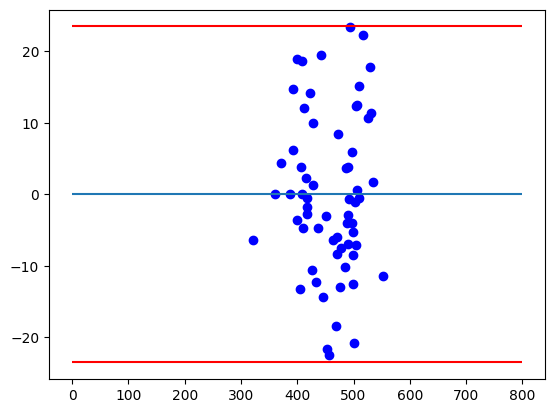

In [37]:
y_pred = metodo.predict(X.values)

x_plot = plt.scatter(y_pred, (y_pred - y), c='b')
plt.hlines(y=0, xmin= -1, xmax=800)

plt.hlines(y=2*RMSE, xmin= -1, xmax=800,color="r")
plt.hlines(y=-2*RMSE, xmin= -1, xmax=800,color="r")
plt.show()

<a name="mejorando"></a>
## Mejorando el modelo

El histograma nos sugiere que quizás el modelo sea mejor si dividimos el conjunto en dos

100%|██████████| 500/500 [00:01<00:00, 278.15it/s]


11.387011999999999


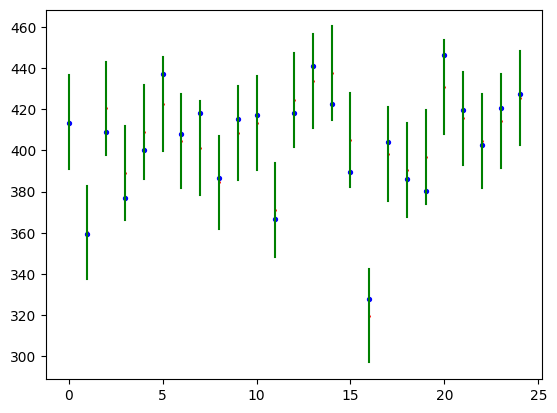

In [38]:
df2 = df[df[yColumn]<450]
X = df2[XColumns]
y = df2[yColumn]

metodo = LinearRegression()
modelo = metodo.fit(X.values,y)

r2,RMSE,mae,bias = evalua_regresion(df2,XColumns,yColumn)
print(RMSE)

x = range(len(y))
y_pred = modelo.predict(X.values)
plt.scatter(x,y_pred,color="red",s=1)
plt.scatter(x,y,color="blue",s=8)
for i,v in enumerate(y_pred):
    plt.plot([x[i],x[i]], [v-2*RMSE,v+2*RMSE],color="green")

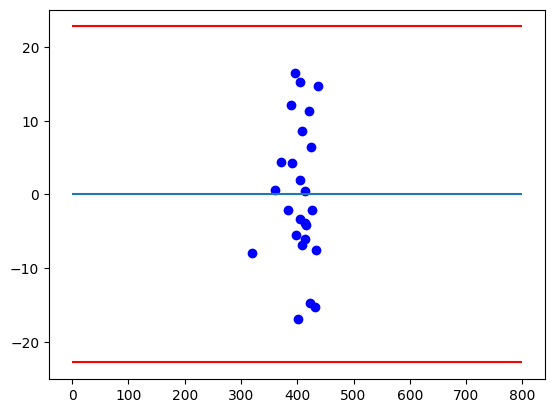

In [39]:
x_plot = plt.scatter(y_pred, (y_pred - y), c='b')
plt.hlines(y=0, xmin= -1, xmax=800)

plt.hlines(y=2*RMSE, xmin= -1, xmax=800,color="r")
plt.hlines(y=-2*RMSE, xmin= -1, xmax=800,color="r")
plt.show()

100%|██████████| 500/500 [00:01<00:00, 279.48it/s]


11.387125999999999


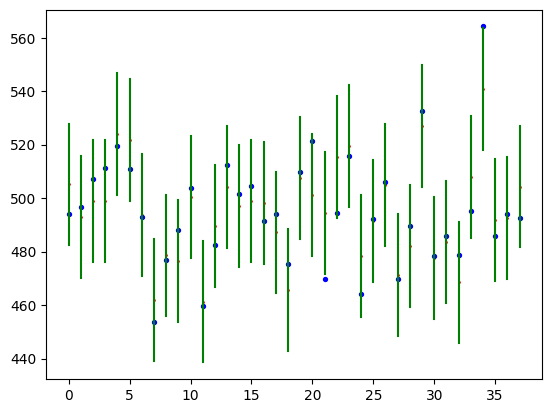

In [40]:
df2 = df[df[yColumn]>=450]
X = df2[XColumns]
y = df2[yColumn]

metodo = LinearRegression()
modelo = metodo.fit(X.values,y)

r2,RMSE,mae,bias = evalua_regresion(df2,XColumns,yColumn)
print(RMSE)

x = range(len(y))
y_pred = modelo.predict(X.values)
plt.scatter(x,y_pred,color="red",s=1)
plt.scatter(x,y,color="blue",s=8)
for i,v in enumerate(y_pred):
    plt.plot([x[i],x[i]], [v-2*RMSE,v+2*RMSE],color="green")

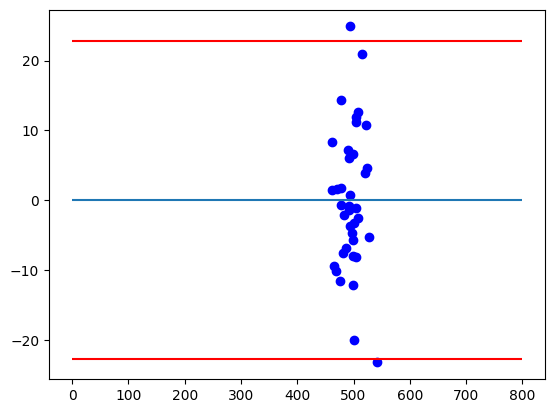

In [41]:
x_plot = plt.scatter(y_pred, (y_pred - y), c='b')
plt.hlines(y=0, xmin= -1, xmax=800)

plt.hlines(y=2*RMSE, xmin= -1, xmax=800,color="r")
plt.hlines(y=-2*RMSE, xmin= -1, xmax=800,color="r")
plt.show()

<a name="lasso"></a>
##  Ridge y Lasso

Muy útil cuando hay pocos valores para entrenar

In [42]:
# Carga del fichero
import pandas as pd
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/pisaDataClean.csv"
df = pd.read_csv(url)

# 1
XColumns = ["SCI", "REA"]
yColumn = "MAT"
X = df[XColumns]
y = df[yColumn]

# 2
from sklearn.model_selection import train_test_split
test = 0.95
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test)

# 3
from sklearn.linear_model import LinearRegression
metodo = LinearRegression()
modelo = metodo.fit(X_train,y_train)

# 4
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test,y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
print(f"r^2: {round(r2,3)} RMSE: {round(rmse,3)}, MAE:{round(mae,3)}")

r^2: 0.938 RMSE: 12.662, MAE:10.128


In [43]:
from sklearn.linear_model import Lasso
modelo = Lasso(alpha=6).fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test,y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
print(f"r^2: {round(r2,3)} RMSE: {round(rmse,3)}, MAE:{round(mae,3)}")

r^2: 0.938 RMSE: 12.577, MAE:10.06


In [44]:
from sklearn.linear_model import Ridge
modelo = Ridge(alpha=6).fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test,y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
print(f"r^2: {round(r2,3)} RMSE: {round(rmse,3)}, MAE:{round(mae,3)}")

r^2: 0.938 RMSE: 12.623, MAE:10.113


ElasticNet combina los dos

In [45]:
from sklearn.linear_model import ElasticNet
modelo = ElasticNet(alpha=6, l1_ratio=0.5).fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test,y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
print(f"r^2: {round(r2,3)} RMSE: {round(rmse,3)}, MAE:{round(mae,3)}")

r^2: 0.938 RMSE: 12.566, MAE:10.072


<a name="series"></a>
##  Series temporales

El principal problema es preparar los datos para que coincidan el "futuro" que queremos


In [46]:
url = "https://raw.githubusercontent.com/RafaelCaballero/BME/main/data/currencies.csv"
df_cur = pd.read_csv(url)[["Close_CAD","Close_JPY","Close_EUR"]]
df_cur

,Close_CAD,Close_JPY,Close_EUR
0,1.30420,0.009160,1.196501
1,1.29660,0.009197,1.208897
2,1.30010,0.009234,1.212298
3,1.31140,0.009236,1.208094
4,1.30290,0.009292,1.218695
...,...,...,...
5259,1.34520,0.006763,1.095014
5260,1.34845,0.006813,1.094296
5261,1.34775,0.006815,1.093135
5262,1.34931,0.006774,1.092777


In [47]:
df_cur.describe()

,Close_CAD,Close_JPY,Close_EUR
count,5264.000000,5264.000000,5264.000000
mean,1.195177,0.009472,1.235163
std,0.132616,0.001440,0.127040
min,0.918700,0.006594,0.959619
25%,1.059420,0.008668,1.124271
50%,1.237025,0.009187,1.222651
75%,1.314500,0.009962,1.329191
max,1.457800,0.013203,1.598798


In [48]:
import pandas as pd
def estadísticas(df):
  # solo las columnas numéricas
  df2 = df.select_dtypes(include=["number"])
  datos = []
  for c in df2:
      variable = df2[c]
      datos.append([variable.mean(), variable.median(), variable.std(), (variable-variable.median()).abs().median()])

  estad = pd.DataFrame(datos,columns=["mean","median","std","MAD"],index=df2.columns)
  return estad

estadísticas(df_cur)

,mean,median,std,MAD
Close_CAD,1.195177,1.237025,0.132616,0.100370
Close_JPY,0.009472,0.009187,0.001440,0.000623
Close_EUR,1.235163,1.222651,0.127040,0.101047


Primer intento:

In [49]:

def regresión(df,XColumns,yColumn):
  # 1
  X = df[XColumns]
  y = df[yColumn]

  # 2
  from sklearn.model_selection import train_test_split
  test = 0.70
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test)

  # 3
  from sklearn.linear_model import LinearRegression
  metodo = LinearRegression()
  modelo = metodo.fit(X_train,y_train)

  # 4
  from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
  import math
  y_pred = modelo.predict(X_test)
  r2 = r2_score(y_test,y_pred)
  rmse = math.sqrt(mean_squared_error(y_test,y_pred))
  mae = mean_absolute_error(y_test,y_pred)
  print(f"r^2: {round(r2,3)} RMSE: {round(rmse,3)}, MAE:{round(mae,3)}")


XColumns = ["Close_CAD", "Close_JPY"]
yColumn = "Close_EUR"
regresión(df_cur,XColumns,yColumn)

r^2: 0.699 RMSE: 0.07, MAE:0.055


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


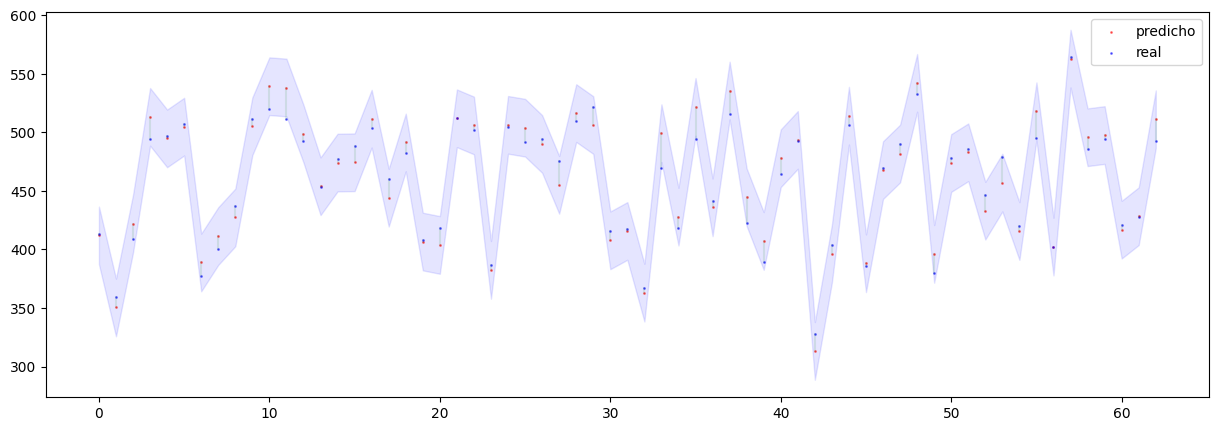

In [50]:
import matplotlib.pyplot as plt
x = range(len(y))
fig, ax = plt.subplots(figsize=(15, 5))
y_pred = modelo.predict(X.values)
ci = 1.96*rmse
for i,v in enumerate(y_pred):
    plt.plot([x[i],x[i]], [v,y[i]],color="green",alpha=0.1)
ax.fill_between(x, ( y_pred-ci), ( y_pred+ci), color='b', alpha=.1)
ax.scatter(x,y_pred,color="red",s=1, label="predicho",alpha=0.5)
ax.scatter(x,y,color="blue",s=1,label="real",alpha=0.5)
plt.legend()
plt.show()

Sin embargo esto está mal y por varias razones:

1 Estamos calculando el cierre del mismo día...intentamos predecir el dato que ya tenemos

2 Mezclamos futuros y pasados (solución: TimeSeriesSplit())

In [51]:
futuro = 200 #  días
euro_f = df_cur.loc[futuro:,"Close_EUR"]
euro_f, df_cur.Close_EUR


(200     1.206593
 201     1.209907
 202     1.218903
 203     1.224200
 204     1.227295
           ...   
 5259    1.095014
 5260    1.094296
 5261    1.093135
 5262    1.092777
 5263    1.095530
 Name: Close_EUR, Length: 5064, dtype: float64,
 0       1.196501
 1       1.208897
 2       1.212298
 3       1.208094
 4       1.218695
           ...   
 5259    1.095014
 5260    1.094296
 5261    1.093135
 5262    1.092777
 5263    1.095530
 Name: Close_EUR, Length: 5264, dtype: float64)

In [52]:
euro_f2  = euro_f.reset_index(drop=True)
euro_f2

0       1.206593
1       1.209907
2       1.218903
3       1.224200
4       1.227295
          ...   
5059    1.095014
5060    1.094296
5061    1.093135
5062    1.092777
5063    1.095530
Name: Close_EUR, Length: 5064, dtype: float64

In [53]:
df_cur["label"] = euro_f2
df_cur

,Close_CAD,Close_JPY,Close_EUR,label
0,1.30420,0.009160,1.196501,1.206593
1,1.29660,0.009197,1.208897,1.209907
2,1.30010,0.009234,1.212298,1.218903
3,1.31140,0.009236,1.208094,1.224200
4,1.30290,0.009292,1.218695,1.227295
...,...,...,...,...
5259,1.34520,0.006763,1.095014,NaN
5260,1.34845,0.006813,1.094296,NaN
5261,1.34775,0.006815,1.093135,NaN
5262,1.34931,0.006774,1.092777,NaN


Tenemos que quitar los nulos; ponemos todo junto

In [54]:
futuro = 2 #  días
euro_f = df_cur.loc[futuro:,"Close_EUR"]
euro_f, df_cur.Close_EUR
euro_f2  = euro_f.reset_index(drop=True)
df_cur["label"] = euro_f2

XColumns = ["Close_CAD", "Close_JPY"]
yColumn = "label"
regresión(df_cur.dropna(),XColumns,yColumn)

r^2: 0.689 RMSE: 0.071, MAE:0.055


In [55]:
XColumns = ["Close_CAD", "Close_JPY", "Close_EUR"]
yColumn = "label"
df = df_cur.dropna()
regresión(df,XColumns,yColumn)

r^2: 0.992 RMSE: 0.012, MAE:0.008


Esto tiene muy buena pinta, pero debemos comparar con la predicción más simple: la predicción naïve

In [56]:
y_pred = df.Close_EUR
y_test = df.label
r2 = r2_score(y_test,y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
print(f"r^2: {round(r2,3)} RMSE: {round(rmse,3)}, MAE:{round(mae,3)}")

r^2: 0.991 RMSE: 0.012, MAE:0.008


La predicción no era tan buena como pensábamos...